# Comparison of the threshold of the mean-field optimum and mean-field equilibrium in the SIR model with vaccinations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.pyplot as plt

The function to compute the mean-field equilibrium

In [2]:
def mf_equilibrium():
    
    thr_mass=0; count2=0; n_loops_max=1000
    thr_pl0=-1;
    best_pol=np.zeros(C+1);

    while (thr_mass != thr_pl0 and count2<n_loops_max):
        
        x_S = np.zeros(C+1); x_I = np.zeros(C+1);
        policy = np.zeros(C+1);
        x_S[0]=S0; x_I[0]=I0;
        for i in range(C):
            if i<thr_mass:
                policy[i]=theta;
            else:
                policy[i]=vac_min;
            x_S[i+1] = x_S[i]+(-gamma*x_I[i]*x_S[i] - policy[i]*x_S[i])/C;
            x_I[i+1] = x_I[i]+(gamma*x_I[i]*x_S[i] - rho*x_I[i])/C;    

        for count in range(C):
            t_ = C - count ;
            if c_V - vs[t_] < 0:
                best_pol[t_-1]=theta;
                p_s_s=1 - 1.*gamma*x_I[t_-1]/C - 1.*theta/C;
                p_s_i=1.*gamma*x_I[t_-1]/C; 
                vs[t_-1]= theta * c_V /C + p_s_s * vs[t_] + p_s_i * vi[t_];
            else:
                best_pol[t_-1]=vac_min;
                p_s_s=1 - 1.*gamma*x_I[t_-1]/C - vac_min/C;
                p_s_i=gamma*x_I[t_-1]/C; 
                vs[t_-1]= vac_min * c_V/C + p_s_s * vs[t_] + p_s_i * vi[t_];   
            p_i_i=1-rho/C; 
            vi[t_-1] = c_I/C + p_i_i * vi[t_];   
         
        thr=0;
        count2=count2+1;
        for i in range(C+1):
            if vs[i]<c_V:
                thr_pl0=i;
                break;
        
        d=0.5
        if thr_mass > thr_pl0:
#            thr_mass = thr_pl0 + math.floor(d*(thr_mass - thr_pl0));
            thr_mass = thr_mass - 1;
        if thr_mass < thr_pl0:
#            thr_mass = thr_pl0 + math.floor(d*(thr_mass - thr_pl0));
            thr_mass = thr_mass + 1;  
        
#        print (thr_pl0, thr_mass, vs[0]*S0+vi[0]*I0, count2);
    
    if count2==n_loops_max:
        print('MFE not found')
    
    return thr_pl0, vs, vi;

The function to compute the mean-field optimum

In [5]:
def mf_optimum():
    my_policy=np.zeros(C+1);
    j=0;
    v=np.zeros(C+1);
    x_S=np.zeros(C+1);
    x_I=np.zeros(C+1);

    for t_critical in range(C+1):
        x_S[0]=S0; x_I[0]=I0;
        for i in range(C):
            if i<t_critical:
                myvac=theta;
                my_policy[i]=theta;
            else:
                myvac=vac_min;
                my_policy[i]=vac_min;
            x_S[i+1] = x_S[i]+(-gamma*x_I[i]*x_S[i] - myvac*x_S[i])/C;
            x_I[i+1] = x_I[i]+(gamma*x_I[i]*x_S[i] - rho*x_I[i])/C;    

        v[j]= sum(1.*c_I*x_I/C+1.*c_V*x_S*my_policy/C);    
        j = j+1;

    mymin=v[0];
    mypos=0;
    for i in range(C+1):
        if (v[i]<mymin):
            mymin = v[i];
            mypos = i;

    return mypos, mymin; 
    

System parameters setting and computation of thresholds

Text(0, 0.5, 'Jump time')

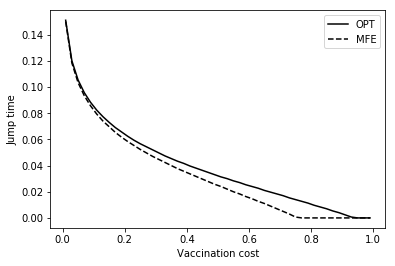

In [12]:
# system parameters
gamma = 73.0     # infection rate
rho = 36.5       # recovery rate
vac_min = 0.0    # minimum vaccination rate
theta = 10.0     # maximum vaccination rate
T = 1            # time horizon

# costs
c_V = 0.5       # cost per unit time of vaccination
c_I = 36.5      # cost per unit time of infection

# the uniformization constant (higher than gamma, rho and theta)
C=T*3000;
v_t=T*np.arange(0,1+1/C,1/C);

#other stuff
x_S = np.zeros(C+1); x_I = np.zeros(C+1)
v = np.zeros(C+1)
vs = np.zeros(C+1); vi = np.zeros(C+1)

#initial conditions
S0=0.4;
I0=0.4;

j=0;
#t_opt=np.zeros(3)
#t_eq=np.zeros(3)
#v_cV=np.arange(0.1,1.01,0.4)
t_opt=np.zeros(50)
t_eq=np.zeros(50)
v_cV=np.arange(0.01,1.01,0.02)

#np.array([0.2, 0.4, 0.6, 0.8, 1])
for c_V in v_cV:
    t_opt[j],cost_opt=mf_optimum()
    t_eq[j],vs,vi=mf_equilibrium()
    j=j+1
    
plt.plot(v_cV,t_opt/C,'k',label='OPT')
plt.plot(v_cV,t_eq/C,'--k',label='MFE')
plt.legend()#(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.xlabel('Vaccination cost')
plt.ylabel('Jump time')
#plt.savefig('jumptimecomp.pdf')
#plt.savefig('jumptimecomp.jpg')
#fig
